In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline
import pickle
import tensorflow as tf


In [15]:
TRAIN_DATA_PATH = r''
NUM_OF_LETTERS = 26 # "A" to "Z" 
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

LABELS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
        'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']
print(len(LABELS))

26


In [16]:
y_unique = []
x_unique = []
for alphabet in os.listdir(TRAIN_DATA_PATH):
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+alphabet):
        X=imread(TRAIN_DATA_PATH+str('\\')+alphabet+str('\\')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

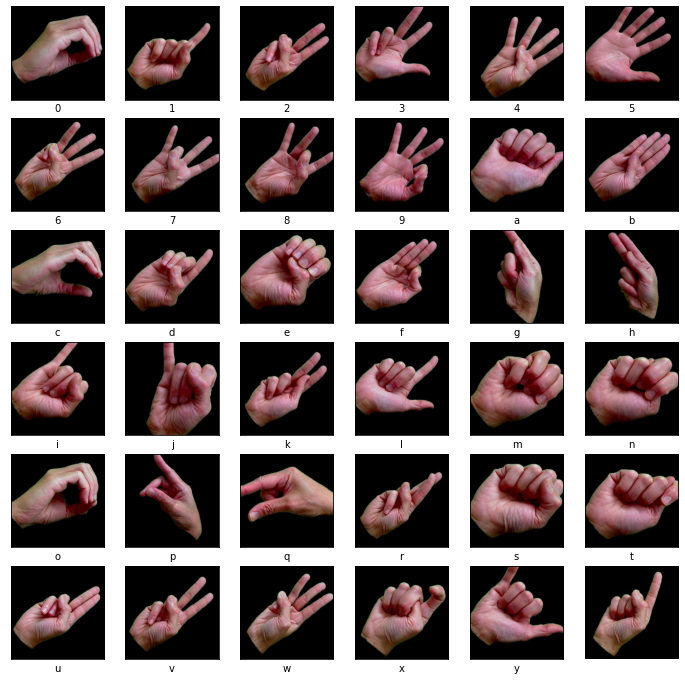

In [17]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [18]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_10_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_17_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_18_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_24_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_25_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_32_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_33_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_3_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_3_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_40_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_40_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_40_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_40_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_40_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_40_rotate_5.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_48_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_55_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_55_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_55_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_55_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_56_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_56_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_56_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_56_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_62_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_63_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_70_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_70_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_70_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_70_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_70_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_70_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_7_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\a\a_7_rotate_10.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_15_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_23_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_31_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_3_rotate_7.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_48_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_56_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_56_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_57_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_57_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_57_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_57_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_57_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_57_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_65_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_65_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_65_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_65_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_65_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_65_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_66_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_66_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_9_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\b\b_9_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_10_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_10_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_10_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_10_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_10_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_10_rotate_5.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_18_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_18_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_18_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_18_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_19_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_19_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_19_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_19_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_26_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_34_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_42_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_50_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_58_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_58_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_58_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_59_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_59_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_59_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_59_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_59_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_66_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_66_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_66_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_66_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_67_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_67_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_67_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\c\c_67_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_10_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_10_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_10_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_10_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_10_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_11_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_11_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_11_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_19_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_19_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_19_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_1_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_1_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_1_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_1_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_1_rotate_4.jpeg
C:\U

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_28_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_36_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_36_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_36_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_36_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_36_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_36_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_37_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_37_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_44_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_44_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_45_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_45_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_45_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_45_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_45_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_45_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_53_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_53_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_53_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_53_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_53_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_54_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_54_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_54_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_62_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_62_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_62_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_62_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_62_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_62_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_63_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_63_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_70_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\d\d_7_rotate_6.jpeg
C:\Use

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_15_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_15_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_15_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_15_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_16_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_16_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_16_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_16_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_23_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_23_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_23_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_23_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_23_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_23_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_24_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_24_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_31_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_39_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_3_rotate_1.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_46_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_46_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_46_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_46_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_46_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_46_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_47_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_47_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_53_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_53_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_53_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_53_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_54_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_54_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_54_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_54_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_61_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_62_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_69_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_69_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_6_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_6_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_6_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_6_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_6_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\e\e_6_rotate_5.jpeg
C:\Us

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_12_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_12_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_12_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_13_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_13_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_13_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_13_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_13_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_1_rotate_8.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_27_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_27_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_27_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_27_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_27_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_27_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_28_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_28_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_34_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_35_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_42_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_42_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_42_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_42_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_42_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_43_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_43_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_43_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_50_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_57_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_58_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_66_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_66_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_66_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_66_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_66_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_66_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_67_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\f\f_67_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_11_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_1_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_20_rotate_6.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_29_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_29_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_2_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_2_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_2_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_2_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_2_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_2_rotate_5.jpeg
C:\Us

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_37_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_37_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_38_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_38_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_38_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_38_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_38_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_38_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_45_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_45_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_45_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_45_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_45_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_45_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_46_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_46_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_53_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_53_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_54_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_54_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_54_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_54_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_54_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_54_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_60_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_60_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_60_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_61_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_61_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_61_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_61_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_61_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\g\g_6_rotate_9.jpeg
C:\Users

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_12_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_13_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_1_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_20_rotate_1.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_29_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_29_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_29_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_29_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_29_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_29_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_2_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_2_rotate_10.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_37_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_44_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_45_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_50_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_50_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_51_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_51_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_51_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_51_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_51_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_51_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_59_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_66_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_66_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_66_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_67_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_67_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_67_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_67_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_67_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_8_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_8_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_8_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_8_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_8_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_8_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_9_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\h\h_9_rotate_10.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_15_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_15_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_15_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_16_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_16_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_16_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_16_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_16_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_21_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_22_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_27_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_28_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_33_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_33_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_33_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_34_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_34_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_34_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_34_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_34_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_3_rotate_9.jpeg
C:\Users

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_48_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_48_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_48_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_48_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_48_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_48_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_49_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_49_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_54_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_61_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_61_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_61_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_61_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_62_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_62_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_62_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_62_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_6_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_6_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_70_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_70_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_70_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_70_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_70_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\i\i_70_rotate_5.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_15_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_15_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_15_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_15_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_15_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_16_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_16_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_16_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_23_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_24_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_31_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_32_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_38_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_38_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_38_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_38_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_38_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_39_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_39_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_39_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_46_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_46_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_47_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_47_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_47_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_47_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_47_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_47_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_53_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_60_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_60_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_60_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_60_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_61_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_61_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_61_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_61_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_69_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_69_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_69_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_69_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_69_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_69_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_6_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\j\j_6_rotate_10.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_11_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_12_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_17_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_18_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_25_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_25_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_25_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_25_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_25_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_26_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_26_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_26_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_33_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_33_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_33_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_33_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_34_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_34_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_34_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_34_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_41_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_42_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_49_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_56_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_56_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_56_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_57_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_57_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_57_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_57_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_57_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_65_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\k\k_66_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_10_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_19_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_26_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_27_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_34_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_34_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_34_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_34_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_34_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_35_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_35_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_35_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_43_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_52_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_60_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_60_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_60_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_60_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_60_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_61_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_61_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_61_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\l\l_6_rotate_7.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_14_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_15_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_22_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_30_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_31_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_39_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_39_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_39_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_39_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_39_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_39_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_3_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_3_rotate_10.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_47_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_47_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_48_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_48_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_48_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_48_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_48_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_48_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_55_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_55_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_55_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_55_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_55_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_56_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_56_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_56_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_62_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_62_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_62_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_63_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_63_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_63_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_63_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_63_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\m\m_70_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_14_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_14_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_15_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_15_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_15_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_15_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_15_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_15_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_22_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_23_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_30_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_39_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_39_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_39_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_39_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_39_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_3_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_3_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_3_rotate_2.jpeg
C:

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_47_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_47_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_47_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_47_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_47_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_48_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_48_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_48_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_56_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_63_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_63_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_64_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_64_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_64_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_64_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_64_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_64_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_7_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_7_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_7_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_7_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_8_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_8_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_8_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\n\n_8_rotate_3.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_16_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_16_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_16_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_16_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_17_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_17_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_17_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_17_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_24_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_31_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_32_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_3_rotate_7.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_48_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_49_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_57_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_65_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\o\o_9_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_10_rotate_1.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_19_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_28_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_37_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_45_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_45_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_45_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_45_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_45_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_46_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_46_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_46_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_54_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_60_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_60_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_60_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_61_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_61_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_61_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_61_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_61_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\p\p_69_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_13_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_13_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_13_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_13_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_13_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_13_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_14_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_14_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_21_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_21_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_21_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_21_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_21_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_21_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_22_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_22_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_2_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_30_rotate_6.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_39_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_47_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_47_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_47_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_48_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_48_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_48_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_48_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_48_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_56_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_57_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_64_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_8_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_8_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_8_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_9_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_9_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_9_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_9_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\q\q_9_rotate_4.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_18_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_19_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_26_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_26_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_27_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_27_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_27_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_27_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_27_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_27_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_35_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_35_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_35_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_36_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_36_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_36_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_36_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_36_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_44_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_44_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_45_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_45_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_45_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_45_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_45_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_45_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_53_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_61_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_62_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_70_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_70_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_70_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_70_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_7_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_7_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_7_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\r\r_7_rotate_3.jpeg
C:\

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_15_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_15_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_15_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_15_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_16_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_16_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_16_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_16_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_23_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_23_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_23_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_23_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_24_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_24_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_24_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_24_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_31_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_31_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_31_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_31_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_32_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_32_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_32_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_32_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_3_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_3_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_3_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_3_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_3_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_3_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_40_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_40_rotate_10.jpeg
C:\Us

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_48_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_49_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_54_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_54_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_54_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_54_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_55_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_55_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_55_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_55_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_61_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_69_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_69_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_69_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_69_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_69_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_69_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_6_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\s\s_6_rotate_10.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_12_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_1_rotate_7.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_27_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_27_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_27_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_27_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_27_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_28_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_28_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_28_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_34_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_41_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_42_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_4_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_4_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_50_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_50_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_50_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_50_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_50_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_50_rotate_5.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_58_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_58_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_58_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_58_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_58_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_58_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_59_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_59_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_65_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_65_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_6_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_6_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_6_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_6_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_6_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\t\t_6_rotate_5.jpeg
C:\Us

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_14_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_14_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_15_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_15_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_15_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_15_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_15_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_15_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_23_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_31_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_3_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_3_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_3_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_40_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_40_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_40_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_40_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_40_rotate_4.jpeg
C:

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_49_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_4_rotate_1.jpeg
C

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_57_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_65_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\u\u_9_rotate_9.jpeg
C:\Users

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_17_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_17_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_17_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_17_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_18_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_18_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_18_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_18_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_26_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_26_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_26_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_26_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_27_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_27_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_27_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_27_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_33_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_33_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_33_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_34_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_34_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_34_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_34_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_34_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_41_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_4_rotate_7.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_57_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_57_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_57_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_58_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_58_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_58_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_58_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_58_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_65_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_65_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_66_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_66_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_66_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_66_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_66_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_66_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_9_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_9_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_9_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\v\v_9_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_10_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_10_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_10_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_10_rotate_3.jpeg
C:\

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_17_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_24_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_25_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_32_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_40_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_48_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_48_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_49_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_49_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_49_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_49_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_49_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_49_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_56_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_57_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_64_rotate_8.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_7_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_7_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_7_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_8_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_8_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_8_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_8_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\w\w_8_rotate_4.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_16_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_16_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_16_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_16_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_16_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_16_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_17_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_17_rotate_10.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_23_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_23_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_23_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_23_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_24_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_24_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_24_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_24_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_31_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_39_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_39_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_3_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_3_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_3_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_3_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_3_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_3_rotate_5.jpeg
C:\Us

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_47_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_48_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_54_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_62_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_6_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\x\x_70_rotate_1.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_14_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_14_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_14_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_15_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_15_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_15_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_15_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_15_rotate_4.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_20_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_20_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_20_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_20_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_20_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_21_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_21_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_21_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_27_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_28_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_32_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_33_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_41_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_4_rotate_7.jpeg
C:\User

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_57_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_57_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_57_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_57_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_58_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_58_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_58_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_58_rotate_3.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_64_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_65_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\y\y_8_rotate_9.jpeg
C:\Users

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_17_rotate_7.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_24_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_24_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_24_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_24_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_24_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_25_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_25_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_25_rotate_2.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_32_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_33_rotate_6.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_41_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_41_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_42_rotate_1.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_42_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_42_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_42_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_42_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_42_rotate_5.jpeg

C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_50_rotate_9.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_51_rotate_1.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_8.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_59_rotate_9.jpeg


C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_10.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_2.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_3.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_4.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_5.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_6.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_7.jpeg
C:\Users\admin\signlanguage\Sign_language_alphabet_recognizer-master\american-sign-language-dataset\asl\z\z_67_rotate_8.jpeg

In [19]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

18150


In [20]:
X_train=np.array(X_train)

In [21]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(18150, 50, 50, 1)


In [22]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [23]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(18150, 50, 50, 1)


In [24]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [25]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [26]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = (tf.nn.softmax)))



# Compiling CNN Model

In [27]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 50)        500       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 50)        22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 100)       45100     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 100)       90100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 100)       0         
__________

# Training Model

In [29]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 52,
    epochs = 5,
    shuffle = True
)

Epoch 1/5
18150/18150 [==============================] - 1083s 60ms/step - loss: 0.6636 - acc: 0.7835
Epoch 2/5
18150/18150 [==============================] - 1044s 58ms/step - loss: 0.1090 - acc: 0.9624
Epoch 3/5
18150/18150 [==============================] - 1092s 60ms/step - loss: 0.0540 - acc: 0.9822
Epoch 4/5
18150/18150 [==============================] - 916s 50ms/step - loss: 0.0512 - acc: 0.9829
Epoch 5/5
18150/18150 [==============================] - 594s 33ms/step - loss: 0.0370 - acc: 0.9881


# Saving Model for future use

In [30]:
#Saving Model
from keras.models import load_model
model.save('aslmodel.h5') 